In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import mysql.connector
import getpass 
from sqlalchemy import create_engine
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

In [2]:
pd.set_option('display.max_columns', None)

In [6]:
# import and change columns that seem numerical but are categorical:

data = pd.read_csv('aura_df.csv', dtype = {'clase':str,'almacen':str,'ejercicio':str,'mes':str,'dia':str,'hora':str,
                                           'tipo_pago':str,'vendedor':str,'seccion':str,'talla':str,'modelo':str,'color':str,
                                           'producto':str,'descripcion':str,'grupo':str,'subgrupo':str,'linea':str,'marca':str,
                                           'lista':str,'cantidad':float,'descuento':float,'subtotal':float,'iva':float,
                                           'total':float,'costo':float,'proveedor':str,'detalle':str,'costo_ind':float})

In [7]:
data.head(2)

,clase,almacen,ejercicio,mes,dia,hora,tipo_pago,vendedor,seccion,talla,modelo,color,producto,descripcion,grupo,subgrupo,linea,marca,lista,cantidad,descuento,subtotal,iva,total,costo,proveedor,detalle,costo_ind
0,VENTA,T012,2021.0,4.0,14.0,13.0,EF,406.0,UNISEX,T- CHICA,TELA,SURTIDO,3.0,ALMOHADA SIN MARCA BEBE SURTIDO UNISEX T- CHIC...,ALMOHADA,LINEA,BEBE,0,AGUASCALIENTES,1.0,0.0,25.86,4.14,30.0,14.65517,0008,ESTAMPADA C/OLAN S/BOLSA,14.65517
1,VENTA,T013,2021.0,4.0,10.0,17.0,EF,463.0,UNISEX,T- CHICA,TELA,SURTIDO,3.0,ALMOHADA SIN MARCA BEBE SURTIDO UNISEX T- CHIC...,ALMOHADA,LINEA,BEBE,0,AGUASCALIENTES,1.0,0.0,25.86,4.14,30.0,14.65517,0008,ESTAMPADA C/OLAN S/BOLSA,14.65517


In [8]:
data.dtypes

clase           object
almacen         object
ejercicio       object
mes             object
dia             object
hora            object
tipo_pago       object
vendedor        object
seccion         object
talla           object
modelo          object
color           object
producto        object
descripcion     object
grupo           object
subgrupo        object
linea           object
marca           object
lista           object
cantidad       float64
descuento      float64
subtotal       float64
iva            float64
total          float64
costo          float64
proveedor       object
detalle         object
costo_ind      float64
dtype: object

In [ ]:
# Check columns to drop unnecesary before modeling 

# data['clase'].value_counts()              # drop 
# data['almacen'].value_counts()
# data['tipo_pago'].value_counts()
# data['seccion'].value_counts()
# data['talla'].value_counts()
# data['modelo'].value_counts()
# data['color'].value_counts()
# data['descripcion'].value_counts()         # drop
# data['grupo'].value_counts()
# data['subgrupo'].value_counts()
# data['linea'].value_counts()
# data['marca'].value_counts()               # drop for model2
# data['lista'].value_counts()
# data['proveedor'].value_counts()           # drop for model2
# data['detalle'].value_counts()             # drop for model2


# data['cantidad'].value_counts()
# data['descuento'].value_counts()           # drop for model2
# data['subtotal'].value_counts()            #target
# data['iva'].value_counts()                 #drop
# data['total'].value_counts()               #drop
# data['costo'].value_counts()               #check if drop
# data['costo_ind'].value_counts()           #check if drop


In [9]:
# Last changes before modeling:
data.tipo_pago = data.tipo_pago.replace(['T0','CR','TC'],'Otro')
# data.color = data.color.replace(~'SURTIDO','Otro')    # will try it later to improve model
data.subgrupo = data.subgrupo.replace('POMOCION','PROMOCION')
# data.subgrupo = data.subgrupo.replace(~['LINEA','PROMOCION','TRES POR X','PROMOCION 12'],'Otro')    # will try it later to improve model
# data.linea = data.linea.replace(['BASICOS','BLANCOS','DEFAULT','BEBE FEMENINO','BEBE MASCULINO','MUESTRAS'],'Otro')   # will try it later to improve model
data.lista = data.lista.replace('MINIMO','DISTRIBUIDOR')

In [ ]:
#################### pass info to df, pass to sql

In [10]:
model1 = data.copy()

In [11]:
model1 = model1.drop(columns=['clase','descripcion','iva','total'])

#### Divide X & y

In [12]:
X = model1.drop(columns=['subtotal']).copy()

In [13]:
X.head(2)

,almacen,ejercicio,mes,dia,hora,tipo_pago,vendedor,seccion,talla,modelo,color,producto,grupo,subgrupo,linea,marca,lista,cantidad,descuento,costo,proveedor,detalle,costo_ind
0,T012,2021.0,4.0,14.0,13.0,EF,406.0,UNISEX,T- CHICA,TELA,SURTIDO,3.0,ALMOHADA,LINEA,BEBE,0,AGUASCALIENTES,1.0,0.0,14.65517,0008,ESTAMPADA C/OLAN S/BOLSA,14.65517
1,T013,2021.0,4.0,10.0,17.0,EF,463.0,UNISEX,T- CHICA,TELA,SURTIDO,3.0,ALMOHADA,LINEA,BEBE,0,AGUASCALIENTES,1.0,0.0,14.65517,0008,ESTAMPADA C/OLAN S/BOLSA,14.65517


In [14]:
y = model1['subtotal'].copy()

In [15]:
y = pd.DataFrame(y, columns = ['subtotal'])

In [16]:
y.head(2)

,subtotal
0,25.86
1,25.86


#### Split train-test

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
X_num_train = X_train.select_dtypes(np.number)
X_cat_train = X_train.select_dtypes(object)

X_num_test = X_test.select_dtypes(np.number)
X_cat_test = X_test.select_dtypes(object)

#### Check sets

In [19]:
X_num_train.head(2)

,cantidad,descuento,costo,costo_ind
1523063,1.0,0.0,115.51710,134.00000
1016841,3.0,0.0,25.86207,8.62069


<AxesSubplot:>

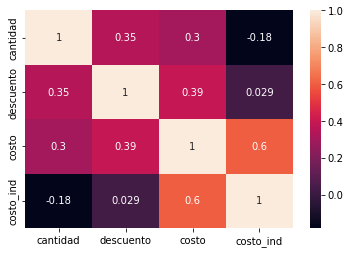

In [20]:
sns.heatmap(X_num_train.corr(), annot=True)

In [21]:
X_cat_train.head(2)

,almacen,ejercicio,mes,dia,hora,tipo_pago,vendedor,seccion,talla,modelo,color,producto,grupo,subgrupo,linea,marca,lista,proveedor,detalle
1523063,T016,2022.0,9.0,27.0,16.0,EF,618.0,INVIERNO,T- UNITALLA,TERCIOPELO,SURTIDO,2572.0,CONJUNTO CHAMARRA,LINEA,DAMA,0143,AGUASCALIENTES,0037,P6028
1016841,T007,2022.0,1.0,29.0,16.0,EF,498.0,INTERIOR,T- UNITALLA,LIKRA,SURTIDO,3334.0,BOXER,LINEA,NIÑO,0054,AGUASCALIENTES,Other,BFBOY02


#### Transform, fit, normalize

In [22]:
transformer = MinMaxScaler().fit(X_num_train)
x_normalized = transformer.transform(X_num_train)
data_normalized = pd.DataFrame(x_normalized, columns = X_num_train.columns)

In [23]:
data_normalized.head(5)

,cantidad,descuento,costo,costo_ind
0,0.000000,0.109468,0.006132,0.458141
1,0.004175,0.109468,0.001337,0.027173
2,0.000000,0.109468,0.000396,0.025928
3,0.000000,0.109468,0.000167,0.009867
4,0.000000,0.109468,0.000396,0.025928


In [25]:
encoder = OneHotEncoder(drop='first').fit(X_cat_train)
encoded = encoder.transform(X_cat_train).toarray()

cols = encoder.get_feature_names(input_features=X_cat_train.columns)
onehot_encoded = pd.DataFrame(encoded, columns=cols)

In [ ]:
onehot_encoded.head(2)

In [ ]:
X_train_treated = pd.concat([onehot_encoded, data_normalized], axis=1)

In [ ]:
%%time
X_train_treated.head(2)

In [ ]:
model1 = DecisionTreeRegressor(max_depth=10,
                              min_samples_leaf = 2,
                              min_samples_split = 10)
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
from sklearn.neighbors import KNeighborsRegressor
model3 = KNeighborsRegressor(n_neighbors=7,n_jobs = -1)
from sklearn.preprocessing import StandardScaler
# model4 = RandomForestRegressor(max_depth=10,                    # try and run it without randomforest
#                               min_samples_leaf = 2,
#                               min_samples_split = 10,
#                               n_jobs = -1)

In [ ]:
%%time
model_pipeline = [model1, model2, model3,model4]
model_names = ['Decision Tree Regressor', 'Linear Regression', 'KNN']#, 'Random Forest Regressor']
scores = {}
for model, model_name in zip(model_pipeline, model_names):
    mean_score = np.mean(cross_val_score(model, X_train_treated, y_train, cv=5))
    scores[model_name] = mean_score
    print('Model '+model_name+ ' done.')
print(scores)

In [ ]:
# Now for the testing data

# NORMALIZING AND ONEHOTENCODING
numerical_test = X_test.select_dtypes(np.number)
categorical_test = X_test.select_dtypes(object)

# MINMAX
X_normalized_test = transformer.transform(numerical_test)
X_normalized_test = pd.DataFrame(X_normalized_test, columns=numerical_test.columns)

# ONEHOT
encoded = encoder.transform(categorical_test).toarray()
onehot_encoded = pd.DataFrame(encoded,columns=encoder.get_feature_names_out(categorical_test.columns))

# concatenating
X_ready_test = pd.concat([X_normalized_test,onehot_encoded],axis=1)

In [ ]:
X_ready_test.to_csv('data.csv', index=False)